# Step 5: Content Analysis

All model inputs can be separated into content (e.g., number of hashtags) and contextual (e.g., number of followers of the author) features.
In this notebook, we want to analyze the former features category.

We want to look at the following features:
* URL count
* Hashtag count
* Mention count
* Tweet length in characters
* Is tweet a quote?
* Hour of tweet creation

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# load feature array
from tep.utils import load_array
all_features = load_array("data/auxiliary_features.bc")
all_features.shape

(1293005, 15)

In [3]:
# get feature map
from tep.featureGenerator import FeatureGenerator
fg = FeatureGenerator()

In [4]:
_, feat_labels = fg.structured_feature_map()
feat_labels

array(['urls', 'hashtags', 'mentions', 'length', 'followers', 'friends',
       'verified', 'listings', 'tweets', 'tweet_freq', 'favorites',
       'favorite_freq', 'account_age', 'hour', 'quote'],
      dtype='<U31')

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(data=all_features, columns=feat_labels)

In [8]:
# extract content features
df = df[['urls', 'hashtags', 'mentions', 'length', 'quote', 'hour']]
df.head()

,urls,hashtags,mentions,length,quote,hour
0,0.0,0.0,0.0,78.0,0.0,20.0
1,1.0,0.0,0.0,139.0,0.0,16.0
2,1.0,2.0,0.0,89.0,0.0,14.0
3,1.0,0.0,0.0,123.0,0.0,19.0
4,1.0,0.0,2.0,135.0,0.0,19.0


## URL count

In [10]:
pd.options.display.float_format = '{:,.1f}'.format

In [11]:
df['urls'].describe()

count   1,293,005.0
mean            0.6
std             0.5
min             0.0
25%             0.0
50%             1.0
75%             1.0
max             5.0
Name: urls, dtype: float64

In [12]:
from tep.vizUtils import plot_bars

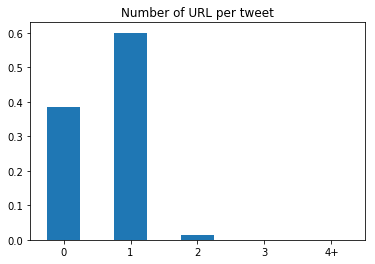

In [13]:
classes = [0, 1, 2, 3]
labels = ['0', '1', '2', '3', '4+']
plot_bars(df['urls'], classes, labels, "Number of URL per tweet")

In [17]:
from tep.utils import class_distribution, discretize

In [18]:
url_classes = discretize(df['urls'], classes)
class_distribution(url_classes, "URL count")

0.0    497987
1.0    775871
2.0     18958
3.0       166
4.0        23
Name: URL count, dtype: int64

In [20]:
pd.options.display.float_format = '{:,.2f}'.format
class_distribution(url_classes, "URL count", normalize=True)

0.00   0.39
1.00   0.60
2.00   0.01
3.00   0.00
4.00   0.00
Name: URL count, dtype: float64

## Hashtag count

In [21]:
df['hashtags'].describe()

count   1,293,005.00
mean            0.41
std             0.75
min             0.00
25%             0.00
50%             0.00
75%             1.00
max            13.00
Name: hashtags, dtype: float64

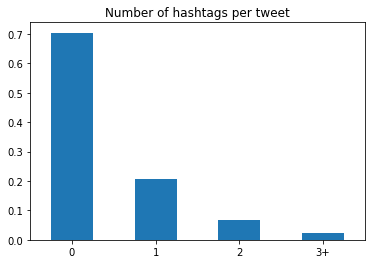

In [25]:
classes = [0, 1, 2]
labels = ['0', '1', '2', '3+']
plot_bars(df['hashtags'], classes, labels, "Number of hashtags per tweet")

In [23]:
hashtag_classes = discretize(df['hashtags'], classes)
class_distribution(hashtag_classes, "Hashtag count")

0.00    910521
1.00    266369
2.00     87737
3.00     28378
Name: Hashtag count, dtype: int64

In [24]:
class_distribution(hashtag_classes, "Hashtag count", normalize=True)

0.00   0.70
1.00   0.21
2.00   0.07
3.00   0.02
Name: Hashtag count, dtype: float64

## Mention count

In [26]:
df['mentions'].describe()

count   1,293,005.00
mean            0.63
std             0.85
min             0.00
25%             0.00
50%             0.00
75%             1.00
max            13.00
Name: mentions, dtype: float64

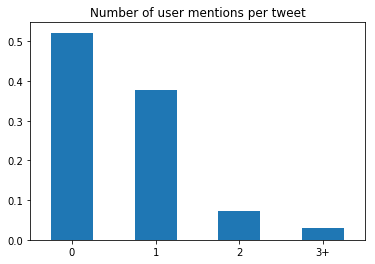

In [27]:
classes = [0, 1, 2]
labels = ['0', '1', '2', '3+']
plot_bars(df['mentions'], classes, labels, "Number of user mentions per tweet")

In [28]:
mention_classes = discretize(df['mentions'], classes)
class_distribution(mention_classes, "Mention count", normalize=True)

0.00   0.52
1.00   0.38
2.00   0.07
3.00   0.03
Name: Mention count, dtype: float64

## Tweet length

In [29]:
df['length'].describe()

count   1,293,005.00
mean          109.21
std            35.16
min             1.00
25%            87.00
50%           124.00
75%           139.00
max           191.00
Name: length, dtype: float64

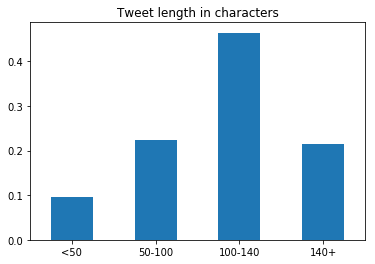

In [30]:
classes = [49, 99, 139]
labels = ['<50', '50-100', '100-140', '140+']
plot_bars(df['length'], classes, labels, "Tweet length in characters")

In [31]:
length_classes = discretize(df['length'], classes)
class_distribution(length_classes, "Tweet length in characters", normalize=True)

0.00   0.10
1.00   0.22
2.00   0.46
3.00   0.22
Name: Tweet length in characters, dtype: float64

## Is tweet a quote?

In [35]:
df['quote'].astype('bool').describe()

count     1293005
unique          2
top         False
freq      1168720
Name: quote, dtype: object

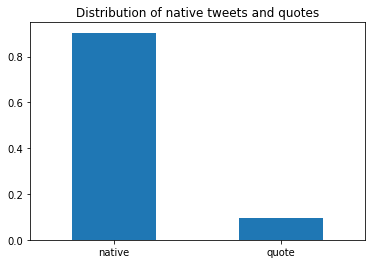

In [36]:
classes = [0]
labels = ['native', 'quote']
plot_bars(df['quote'], classes, labels, "Distribution of native tweets and quotes")

In [37]:
length_classes = discretize(df['quote'], classes)
class_distribution(length_classes, "Quotes vs. native tweets", normalize=True)

0.00   0.90
1.00   0.10
Name: Quotes vs. native tweets, dtype: float64

## Hour of tweet creation

In [38]:
df['hour'].describe()

count   1,293,005.00
mean           14.92
std             6.34
min             0.00
25%            13.00
50%            16.00
75%            19.00
max            23.00
Name: hour, dtype: float64

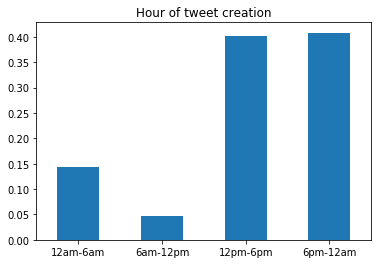

In [45]:
classes = [5, 11, 17]
labels = ['12am-6am', '6am-12pm', '12pm-6pm', '6pm-12am']
plot_bars(df['hour'], classes, labels, "Hour of tweet creation")

In [46]:
hour_classes = discretize(df['hour'], classes)
class_distribution(hour_classes, "Hour of tweet creation", normalize=True)

0.00   0.14
1.00   0.05
2.00   0.40
3.00   0.41
Name: Hour of tweet creation, dtype: float64